In [1]:
from utils.getter import *
import torch.utils.data as data
import torch
import torchvision.models as models
from tqdm import tqdm
import torch.nn as nn

C:\Users\Kay Kieran\.conda\envs\main\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Kay Kieran\.conda\envs\main\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Kay Kieran\.conda\envs\main\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)
[nltk_data] Downloading package stopwords to C:\Users\Kay
[nltk_data]     Kieran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
transforms = Compose([
    Resize((300,300)),
    ToTensor(),
    Normalize(),
])

In [4]:
data_path = "datasets/datasets/Garbage Classification"
voc_path = "datasets/datasets/VOC/images"
voc_anno = {
    "train": "datasets/datasets/VOC/annotations/pascal_train2012.json",
    "val": "datasets/datasets/VOC/annotations/pascal_val2012.json"}

#trainset = ImageClassificationDataset(data_path+ "/train", transforms= transforms, shuffle=True)
#valset = ImageClassificationDataset(data_path+ "/val", transforms= transforms, shuffle = True)

trainset = ObjectDetectionDataset(img_dir=voc_path, ann_path = voc_anno['train'],transforms= transforms)
valset = ObjectDetectionDataset(img_dir=voc_path, ann_path = voc_anno['val'],transforms= transforms)
print(trainset)
print(valset)

Custom Dataset for Object Detection
-------------------------------
Number of samples: 17125
Number of classes: 20

Custom Dataset for Object Detection
-------------------------------
Number of samples: 17125
Number of classes: 20



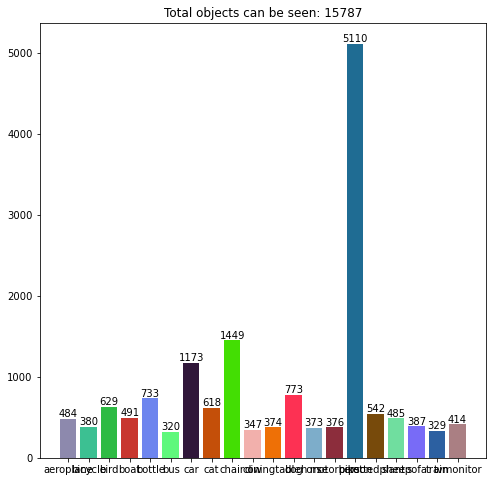

In [8]:
valset.plot()

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using", device)

Using cuda


In [6]:
# Dataloader
BATCH_SIZE = 16
trainloader = data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
valloader = data.DataLoader(valset, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam
metrics = [AccuracyMetric(decimals=3)]

In [ ]:
NUM_CLASSES = len(trainset.classes)
model = ResNet34(NUM_CLASSES,
                 lr = 1e-4,
                 criterion= criterion, 
                 optimizer= optimizer,
                 metrics=  metrics,
                 device = device)
#load_checkpoint(model, "weights/ResNet34-12.pth")

In [ ]:
cp = Checkpoint(save_per_epoch=1)
trainer = Trainer(model,
                 trainloader, 
                 valloader,
                 checkpoint = cp, 
                 evaluate_per_epoch = 1)

trainer.fit(num_epochs=5)

In [ ]:
preds = trainer.inference_batch(valloader)
print(preds)

In [ ]:
idx = 35
print(valset.classes[preds[idx]])
valset.visualize_item(idx, figsize = (8,8))